In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [11]:

try:
    df = pd.read_csv(r"C:\Users\10115439\OneDrive - City of Joburg\Desktop\Data Anlysis and ML\Telco customer churn IBM dataset\Telco_customer_churn.csv")
    print("data has been loaded succesfully")
except:
    print("File not found. Check the path.")



data has been loaded succesfully


In [12]:
pd.set_option("display.max_columns",None)
print(df.head()) 

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2 

In [13]:

df = df.drop(columns=["CustomerID","Country","Zip Code","Count","State", "Lat Long", "Latitude", "Longitude","CLTV","Churn Score","Payment Method","Churn Reason"], errors='ignore')
print("Data after dropping columns:")
print(df.head())


Data after dropping columns:
          City  Gender Senior Citizen Partner Dependents  Tenure Months  \
0  Los Angeles    Male             No      No         No              2   
1  Los Angeles  Female             No      No        Yes              2   
2  Los Angeles  Female             No      No        Yes              8   
3  Los Angeles  Female             No     Yes        Yes             28   
4  Los Angeles    Male             No      No        Yes             49   

  Phone Service Multiple Lines Internet Service Online Security Online Backup  \
0           Yes             No              DSL             Yes           Yes   
1           Yes             No      Fiber optic              No            No   
2           Yes            Yes      Fiber optic              No            No   
3           Yes            Yes      Fiber optic              No            No   
4           Yes            Yes      Fiber optic              No           Yes   

  Device Protection Tech Support 

C:\Users\10115439\AppData\Local\Temp\ipykernel_28600\1414227865.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = [counts.get(0, 0), counts.get(1, 0)]


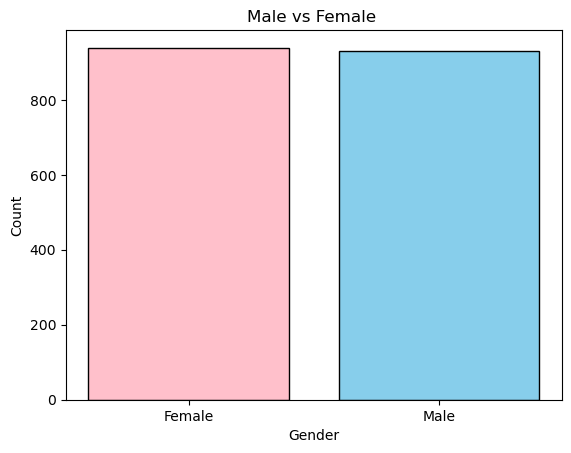

In [17]:


# Filter where Churn = 1
churned_df = df[df["Churn Value"] == 1]

# Count Gender
counts = churned_df["Gender"].value_counts()

# Prepare labels and values
labels = ["Female", "Male"]
values = [counts.get(0, 0), counts.get(1, 0)]

# Plot bar chart
plt.bar(labels, values, color=["pink", "skyblue"], edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male vs Female ")
plt.show()


In [6]:
categorical_cols = [
    'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn Label'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoded DataFrame:")
print(df.head())

Encoded DataFrame:
   City  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
0   562       1               0        0           0              2   
1   562       0               0        0           1              2   
2   562       0               0        0           1              8   
3   562       0               0        1           1             28   
4   562       1               0        0           1             49   

   Phone Service  Multiple Lines  Internet Service  Online Security  \
0              1               0                 0                2   
1              1               0                 1                0   
2              1               2                 1                0   
3              1               2                 1                0   
4              1               2                 1                0   

   Online Backup  Device Protection  Tech Support  Streaming TV  \
0              2                  0             0           

In [7]:
# Check for columns with non-numeric data
import pandas as pd


# Convert 'Total Charges' to numeric, coerce errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Replace NaN (original blanks) with the column mean
df['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)

# Check conversion
print(df['Total Charges'].head())


X=df.drop(columns=["Churn Value"])
y=df["Churn Value"]

model = DecisionTreeClassifier()
model.fit(X,y)

0     108.15
1     151.65
2     820.50
3    3046.05
4    5036.30
Name: Total Charges, dtype: float64


C:\Users\10115439\AppData\Local\Temp\ipykernel_37852\1215434402.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)


DecisionTreeClassifier()

Random test

In [8]:
# Sample input data (matching record 2 from your dataset)
user_input = {
    'City': 'San Francisco',
    'Gender': 'Male',
    'Senior Citizen': 'Yes',
    'Partner': 'Yes',
    'Dependents': 'No',
    'Tenure Months': 36,
    'Phone Service': 'Yes',
    'Multiple Lines': 'Yes',
    'Internet Service': 'DSL',
    'Online Security': 'Yes',
    'Online Backup': 'Yes',
    'Device Protection': 'Yes',
    'Tech Support': 'No',
    'Streaming TV': 'Yes',
    'Streaming Movies': 'No',
    'Contract': 'One year',
    'Paperless Billing': 'No',
    'Monthly Charges': 89.50,
    'Total Charges': 3200.75,
    'Churn Label': 'No'
}


encoded_input = {}
for col in user_input:
    if col in label_encoders:  # encode categorical columns
        encoded_input[col] = label_encoders[col].transform([user_input[col]])[0]
    else:  # numeric columns remain as-is
        encoded_input[col] = user_input[col]


input_df = pd.DataFrame([encoded_input])

pred = model.predict(input_df)[0]
print(f"Predicted Churn Value: {pred}")



Predicted Churn Value: 0


In [9]:
user_input_2 = {
    'City': 'San Diego',
    'Gender': 'Female',
    'Senior Citizen': 'No',
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'Tenure Months': 12,
    'Phone Service': 'Yes',
    'Multiple Lines': 'No',
    'Internet Service': 'Fiber optic',
    'Online Security': 'Yes',
    'Online Backup': 'Yes',
    'Device Protection': 'No',
    'Tech Support': 'Yes',
    'Streaming TV': 'Yes',
    'Streaming Movies': 'Yes',
    'Contract': 'Month-to-month',
    'Paperless Billing': 'Yes',
    'Monthly Charges': 99.99,
    'Total Charges': 1200.45,
    'Churn Label': 'Yes'
}


def predict_churn(sample_input):
    encoded_input = {}
    for col in sample_input:
        if col in label_encoders:
            encoded_input[col] = label_encoders[col].transform([sample_input[col]])[0]
        else:
            encoded_input[col] = sample_input[col]
    input_df = pd.DataFrame([encoded_input])
    return model.predict(input_df)[0]

print("Sample 2 prediction:", predict_churn(user_input_2))


Sample 2 prediction: 1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00
